# Loading the data using Pytorch

In [2]:
import torch
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from torchvision import datasets, transforms

# ✅ Load EMNIST Dataset (ByClass) using PyTorch
transform = transforms.Compose([transforms.ToTensor()])
#Updated split='byclass' to load all 62 character classes (digits + uppercase/lowercase letters).
train_dataset = datasets.EMNIST(root='./data', split='byclass', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='./data', split='byclass', train=False, download=True, transform=transform)

# Print dataset info
print(f"Training Samples: {len(train_dataset)}")
print(f"Testing Samples: {len(test_dataset)}")
print(f"Number of Classes: {len(train_dataset.classes)}")

Training Samples: 697932
Testing Samples: 116323
Number of Classes: 62


#save training and testing data in csv file

In [3]:
import pandas as pd

# ✅ Convert PyTorch Tensors to NumPy arrays
x_train = train_dataset.data.numpy().reshape(-1, 28*28)  # Flatten images (28x28 → 784 pixels)
y_train = train_dataset.targets.numpy()

x_test = test_dataset.data.numpy().reshape(-1, 28*28)
y_test = test_dataset.targets.numpy()

# ✅ Create Pandas DataFrames
df_train = pd.DataFrame(x_train)
df_train.insert(0, "label", y_train)  # Add label column

df_test = pd.DataFrame(x_test)
df_test.insert(0, "label", y_test)

# ✅ Save as CSV files
df_train.to_csv("emnist_train.csv", index=False)
df_test.to_csv("emnist_test.csv", index=False)

print("EMNIST dataset saved as CSV files: emnist_train.csv & emnist_test.csv")

EMNIST dataset saved as CSV files: emnist_train.csv & emnist_test.csv


#checking for missing or null values in full dataset

In [4]:
import torch
from torchvision import datasets, transforms

# Define transformation
transform = transforms.Compose([transforms.ToTensor()])

# Load the train and test datasets
train_dataset = datasets.EMNIST(root='./data', split='byclass', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='./data', split='byclass', train=False, download=True, transform=transform)

# Combine datasets
full_dataset = train_dataset + test_dataset

# ✅ Find number of rows and columns
num_rows = len(full_dataset)  # Total number of samples
sample_data, _ = full_dataset[0]  # Take one sample to find shape
num_columns = sample_data.numel()  # Flattened number of pixels (channels × height × width)

print(f"Number of rows (samples): {num_rows}")
print(f"Number of columns (features per sample): {num_columns}")

# Check for missing or invalid values
for i, (data, label) in enumerate(full_dataset):
    if torch.isnan(data).any() or torch.isinf(data).any() or label is None:
        print(f"Missing or invalid value found at index {i}")
        break
else:
    print("No missing or invalid values found.")


Number of rows (samples): 814255
Number of columns (features per sample): 784
No missing or invalid values found.


In [5]:
# ✅ Find number of rows and columns in training dataset
num_rows = len(train_dataset)  # Total number of samples
sample_data, _ = train_dataset[0]  # Take one sample to find shape
num_columns = sample_data.numel()  # Flattened number of pixels (channels × height × width)

print(f"Number of rows in training dataset: {num_rows}")
print(f"Number of columns in training dataset: {num_columns}")

# ✅ Find number of rows and columns in testing dataset
num_rows = len(test_dataset)  # Total number of samples
sample_data, _ = test_dataset[0]  # Take one sample to find shape
num_columns = sample_data.numel()  # Flattened number of pixels (channels × height × width)

print(f"Number of rows in testing dataset: {num_rows}")
print(f"Number of columns in testing dataset: {num_columns}")

Number of rows in training dataset: 697932
Number of columns in training dataset: 784
Number of rows in testing dataset: 116323
Number of columns in testing dataset: 784


## Reduce size:

In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset
from torch.utils.data import random_split
#small_train_dataset = Subset(train_dataset, range(90000))
#small_test_dataset = Subset(test_dataset, range(5000))

# ✅ Randomly split 90,000 training samples
small_train_dataset, _ = random_split(train_dataset, [90000, len(train_dataset) - 90000])

# ✅ Randomly split 5,000 testing samples
small_test_dataset, _ = random_split(test_dataset, [5000, len(test_dataset) - 5000])

# Print reduced dataset sizes
print(f"Reduced training dataset size: {len(small_train_dataset)} samples")
print(f"Reduced testing dataset size: {len(small_test_dataset)} samples")

# Check a sample shape
sample_data, sample_label = small_train_dataset[0]
print(f"Sample shape: {sample_data.shape} => Flattened: {sample_data.numel()} pixels")

'''# Print reduced dataset sizes
print(f"Reduced training dataset size: {len(small_train_dataset)} samples")
print(f"Reduced testing dataset size: {len(small_test_dataset)} samples")

# Check number of features (columns)
sample_data, _ = small_train_dataset[0]
print(f"Each sample shape: {sample_data.shape} => Number of columns (flattened): {sample_data.numel()}")'''

Reduced training dataset size: 90000 samples
Reduced testing dataset size: 5000 samples
Sample shape: torch.Size([1, 28, 28]) => Flattened: 784 pixels


'# Print reduced dataset sizes\nprint(f"Reduced training dataset size: {len(small_train_dataset)} samples")\nprint(f"Reduced testing dataset size: {len(small_test_dataset)} samples")\n\n# Check number of features (columns)\nsample_data, _ = small_train_dataset[0]\nprint(f"Each sample shape: {sample_data.shape} => Number of columns (flattened): {sample_data.numel()}")'

#remove duplicates values , if any

In [7]:
import pandas as pd

# Extract data and labels from the original EMNIST dataset using the indices from small_train_dataset and small_test_dataset
train_data = train_dataset.data[small_train_dataset.indices]
train_labels = train_dataset.targets[small_train_dataset.indices]

test_data = test_dataset.data[small_test_dataset.indices]
test_labels = test_dataset.targets[small_test_dataset.indices]

# Convert the small datasets into DataFrames for easy manipulation
df_train = pd.DataFrame(train_data.numpy().reshape(-1, 784))  # Reshape the data into 784 columns (flattened images)
df_train['label'] = train_labels.numpy()  # Add the labels

df_test = pd.DataFrame(test_data.numpy().reshape(-1, 784))  # Reshape the data into 784 columns (flattened images)
df_test['label'] = test_labels.numpy()  # Add the labels

# Remove duplicates
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

# Print confirmation
print("✅ Removed duplicate rows (if any).")


✅ Removed duplicate rows (if any).


In [8]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor()  # Convert images to tensors
])

train_dataset = datasets.EMNIST(root='./data', split='byclass', train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root='./data', split='byclass', train=False, download=True, transform=transform)


## normaliza data

In [9]:
# ✅ Normalize pixel values (0 to 1 range)
df_train.iloc[:, 1:] = df_train.iloc[:, 1:] / 255.0  # Normalize all pixel columns
df_test.iloc[:, 1:] = df_test.iloc[:, 1:] / 255.0
# ✅ Print only the first 5 rows to verify
print("Sample Training Data (First 5 Rows):\n", df_train.head())
print("✅ Data Normalized: Pixel values are now between 0 and 1.")


C:\Users\91739\AppData\Local\Temp\ipykernel_27232\1848478435.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
89995    0.0
89996    0.0
89997    0.0
89998    0.0
89999    0.0
Name: 1, Length: 90000, dtype: float64' has dtype incompatible with uint8, please explicitly cast to a compatible dtype first.
  df_train.iloc[:, 1:] = df_train.iloc[:, 1:] / 255.0  # Normalize all pixel columns
C:\Users\91739\AppData\Local\Temp\ipykernel_27232\1848478435.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
89995    0.0
89996    0.0
89997    0.0
89998    0.0
89999    0.0
Name: 2, Length: 90000, dtype: float64' has dtype incompatible with uint8, please explicitly cast to a compatible dtype first.
  df_

Sample Training Data (First 5 Rows):
    0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783     label  
0  0.0  0.0  0.0  0.0  0.0  0.003922  
1  0.0  0.0  0.0  0.0  0.0  0.007843  
2  0.0  0.0  0.0  0.0  0.0  0.184314  
3  0.0  0.0  0.0  0.0  0.0  0.152941  
4  0.0  0.0  0.0  0.0  0.0  0.180392  

[5 rows x 785 columns]
✅ Data Normalized: Pixel values are now between 0 and 1.


C:\Users\91739\AppData\Local\Temp\ipykernel_27232\1848478435.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: 778, Length: 5000, dtype: float64' has dtype incompatible with uint8, please explicitly cast to a compatible dtype first.
  df_test.iloc[:, 1:] = df_test.iloc[:, 1:] / 255.0
C:\Users\91739\AppData\Local\Temp\ipykernel_27232\1848478435.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: 779, Length: 5000, dtype: float64' has dtype incompatible with uint8, please explicitly cast to a compatible dtype first.
  df_test.iloc[:, 1:] = df_test.iloc[:, 1:] / 255.0
C:\Use

# Step 1: Prepare Data for CNN Model
CNNs need image data in shape (28, 28, 1) (not flattened). So, let’s reshape it:

In [10]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Access the original EMNIST dataset inside the Subset object
x_train = small_train_dataset.dataset.data[small_train_dataset.indices].numpy().reshape(-1, 28, 28, 1)  # Reshape the data into 28x28 images with 1 channel
y_train = small_train_dataset.dataset.targets[small_train_dataset.indices].numpy()  # Get the labels

x_test = small_test_dataset.dataset.data[small_test_dataset.indices].numpy().reshape(-1, 28, 28, 1)  # Reshape the data into 28x28 images with 1 channel
y_test = small_test_dataset.dataset.targets[small_test_dataset.indices].numpy()  # Get the labels

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=62)
y_test = to_categorical(y_test, num_classes=62)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (90000, 28, 28, 1)
y_train shape: (90000, 62)
x_test shape: (5000, 28, 28, 1)
y_test shape: (5000, 62)


# define a simple cnn model

In [11]:
from tensorflow.keras import regularizers
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam

# Set Learning Rate
learning_rate = 0.001
l2_reg = 1e-6  # L2 regularization factor

# Input Layer
input_layer = Input(shape=(28, 28, 1))

# 1st Convolution Block
x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg))(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 2nd Convolution Block
x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 3rd Convolution Block
x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 4th Convolution Block
x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flattening
x = Flatten()(x)

# Dense Layers with L2 + Dropout
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = Dropout(0.5)(x)

# Output Layer
output_layer = Dense(62, activation='softmax', kernel_regularizer=regularizers.l2(l2_reg))(x)

# Build & Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 62)             │         4,03

 Total params: 281,726 (1.07 MB)

 Trainable params: 280,958 (1.07 MB)

 Non-trainable params: 768 (3.00 KB)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# TensorFlow data augmentation (alternative to PyTorch augmentation)
datagen = ImageDataGenerator(
    #rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False
)

# Reshape images into (B, 28, 28, 1) for TensorFlow input
x_train = small_train_dataset.dataset.data[small_train_dataset.indices].numpy().reshape(-1, 28, 28, 1)
y_train = small_train_dataset.dataset.targets[small_train_dataset.indices].numpy()

x_test = small_test_dataset.dataset.data[small_test_dataset.indices].numpy().reshape(-1, 28, 28, 1)
y_test = small_test_dataset.dataset.targets[small_test_dataset.indices].numpy()

# Normalize the images to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=62)
y_test = to_categorical(y_test, num_classes=62)

# Augment the training data
'''augmented_images = []
augmented_labels = []

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=1000, shuffle=False):
    augmented_images.append(x_batch)
    augmented_labels.append(y_batch)
    if len(augmented_images) * 1000 >= len(x_train):  # Match original dataset size
        break

# Combine augmented batches
x_train_augmented = np.concatenate(augmented_images, axis=0)
y_train_augmented = np.concatenate(augmented_labels, axis=0)

print(f"x_train_augmented shape: {x_train_augmented.shape}")
print(f"y_train_augmented shape: {y_train_augmented.shape}")

# Flatten augmented images to (num_samples, 784)
x_train_flat = x_train_augmented.reshape(x_train_augmented.shape[0], -1)

# Convert one-hot encoded labels to class integers
y_train_flat = np.argmax(y_train_augmented, axis=1)

# Save images to CSV
df_images = pd.DataFrame(x_train_flat)
df_images.to_csv("augmented_images.csv", index=False)

# Save labels to CSV
df_labels = pd.DataFrame(y_train_flat, columns=["label"])
df_labels.to_csv("augmented_labels.csv", index=False)

print("Augmented images and labels saved to CSV files.")'''


'augmented_images = []\naugmented_labels = []\n\nfor x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=1000, shuffle=False):\n    augmented_images.append(x_batch)\n    augmented_labels.append(y_batch)\n    if len(augmented_images) * 1000 >= len(x_train):  # Match original dataset size\n        break\n\n# Combine augmented batches\nx_train_augmented = np.concatenate(augmented_images, axis=0)\ny_train_augmented = np.concatenate(augmented_labels, axis=0)\n\nprint(f"x_train_augmented shape: {x_train_augmented.shape}")\nprint(f"y_train_augmented shape: {y_train_augmented.shape}")\n\n# Flatten augmented images to (num_samples, 784)\nx_train_flat = x_train_augmented.reshape(x_train_augmented.shape[0], -1)\n\n# Convert one-hot encoded labels to class integers\ny_train_flat = np.argmax(y_train_augmented, axis=1)\n\n# Save images to CSV\ndf_images = pd.DataFrame(x_train_flat)\ndf_images.to_csv("augmented_images.csv", index=False)\n\n# Save labels to CSV\ndf_labels = pd.DataFrame(y_tr

# early stopping

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# train the model

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Learning rate scheduler: reduce learning rate when the validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train

history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/15
  51/1125 ━━━━━━━━━━━━━━━━━━━━ 6:01 337ms/step - accuracy: 0.4416 - loss: 2.2262

KeyboardInterrupt: 

# prediction

In [1]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


NameError: name 'model' is not defined

In [86]:
import numpy as np

# ✅ Extract the image and its correct label from x_test and y_test
index = 222  # index for the sample
image = x_test[index]                   # (28, 28, 1)
label = np.argmax(y_test[index])       # Match the same index for the label

# ✅ Expand dimensions to match model input shape
image = np.expand_dims(image, axis=0)  # Shape becomes (1, 28, 28, 1)

# ✅ Make a prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

# ✅ Print results
print(f"Actual Label (True Value): {label}")
print(f"Predicted Label: {predicted_class}")

# ✅ Check correctness
if predicted_class == label:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Actual Label (True Value): 1
Predicted Label: 1
Prediction is correct!


# testing for unseen data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


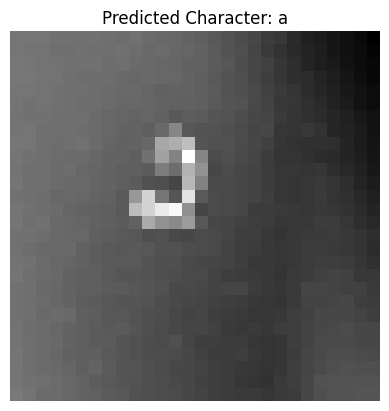

Predicted class index: a
Predicted character: a


In [88]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# ✅ Function to convert class index to character (EMNIST Balanced)
def emnist_class_to_char(index):
    if 0 <= index <= 9:
        return chr(ord('0') + index)          # '0' to '9'
    elif 10 <= index <= 35:
        return chr(ord('A') + index - 10)     # 'A' to 'Z'
    elif 36 <= index <= 61:
        return chr(ord('a') + index - 36)     # 'a' to 'z'
    else:
        return '?'                            # Out of range

# ✅ Load the trained model
model = tf.keras.models.load_model('model4.h5')  # Replace with your actual model path

# ✅ Load and preprocess the image
img_path = r'C:\Users\91739\Downloads\2_emnist.jpg'  # Replace with the path to your image
img = Image.open(img_path).convert('L')  # Convert to grayscale
img = img.resize((28, 28))               # Resize to 28x28
img = np.array(img)                      # Convert to numpy array
img = 255 - img                          # Invert (EMNIST uses white on black)
img = img / 255.0                        # Normalize to 0-1

# ✅ Optional EMNIST-specific preprocessing
# img = np.fliplr(img)                  # Uncomment if your model was trained with mirrored input
# img = np.rot90(img, k=1)              # Uncomment if your model was trained with rotated input

img = img.reshape(1, 28, 28, 1)          # Reshape for model input

# ✅ Make prediction
prediction = model.predict(img)
predicted_class = np.argmax(prediction)
predicted_label = emnist_class_to_char(predicted_class)

# ✅ Display result
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Character: {predicted_label}')
plt.axis('off')
plt.show()

print(f"Predicted class index: {predicted_label}")
print(f"Predicted character: {predicted_label}")


In [77]:
print(np.unique(np.argmax(y_train, axis=1)))  # Should show many classes (not just one)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


In [21]:
model.save('model1.h5')

In [24]:
model.save('model2.h5')

In [55]:
model.save('model3.h5')

In [56]:
model.save('model4.h5')